In [484]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



In [485]:
warnings.filterwarnings("ignore")

#define my seaborn background and themes

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="colorblind")

# Creating functions for data analysis


In [486]:
def eda(df:pd.DataFrame)->None:
  print("-"*15,"DataFrame shape", "-"*15 )
  print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
  print("-"*15,"DataFrame info", "-"*15 )
  print(df.info())
  print("-"*15,"DataFrame isna", "-"*15 )
  print(df.isna().sum())
  print("-"*15,"DataFrame is duplicated", "-"*15 )
  print(df.duplicated().sum())
  print("-"*15,"DataFrame describe numeric", "-"*15 )
  print(df.describe(percentiles=[.01,0.1,.25,.5,.75,.90,.99]))
  print("-"*15,"DataFrame desribe categorical", "-"*15 )
  print(df.describe(exclude=[np.number]))


def is_outlier(array, extreme=False):
  """função para identificar se na coluna há outliers"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)


def date_engineering(df: pd.DataFrame)->pd.DataFrame:
    df["date"]=pd.to_datetime(df["transaction_date"]).dt.date
    df["year"]=pd.to_datetime(df["transaction_date"]).dt.year
    df["month"]=pd.to_datetime(df["transaction_date"]).dt.month
    df["day"]=pd.to_datetime(df["transaction_date"]).dt.day
    df["weekday"]=pd.to_datetime(df["transaction_date"]).dt.weekday
    df["hour"]=pd.to_datetime(df["transaction_date"]).dt.hour
    df["min"]=pd.to_datetime(df["transaction_date"]).dt.minute

    day_map = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
    }

    df["day_of_week"] = df["weekday"].map(day_map)

    return df



# Importing dataset

In [487]:
df=pd.read_html(r"https://gist.github.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97#file-transactional-sample-csv")[0]
df=df.drop(columns="Unnamed: 0")
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


# Data Understanding

In [488]:
eda(df)

--------------- DataFrame shape ---------------
Linhas: 3199, Colunas: 8
--------------- DataFrame info ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB
None
--------------- DataFrame isna ---------------
transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
dev

# Data Exploration

In [489]:
df=date_engineering(df)

In [490]:
day_map = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

df["day_of_week"] = df["weekday"].map(day_map)

In [491]:
df

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False,2019-12-01,2019,12,1,6,23,16,Sunday
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True,2019-12-01,2019,12,1,6,22,45,Sunday
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False,2019-12-01,2019,12,1,6,22,22,Sunday
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True,2019-12-01,2019,12,1,6,21,59,Sunday
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False,2019-12-01,2019,12,1,6,21,30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01T13:05:34.054967,744.15,NaN,False,2019-11-01,2019,11,1,4,13,5,Friday
3195,21323593,9603,59275,528052******3611,2019-11-01T11:47:02.404963,1403.67,NaN,False,2019-11-01,2019,11,1,4,11,47,Friday
3196,21323594,57997,84486,522688******9874,2019-11-01T10:23:50.555604,1.55,NaN,False,2019-11-01,2019,11,1,4,10,23,Friday
3197,21323595,35930,7,544315******7773,2019-11-01T01:29:45.799767,359.68,NaN,False,2019-11-01,2019,11,1,4,1,29,Friday


In [492]:
df_copy=df.dropna(subset="device_id").copy()

In [493]:
# encoding my has_cbk for 0->False 1->True
df["has_cbk"]=df["has_cbk"].apply(lambda x :0 if x == False else 1)



# Analise do comportamento de janela temporal

Em valores absolutos o mes de novembro apresenta valores maiores de chargebakcs comparado com dezembro, porem em valores relativos dezembro apresenta % maior de chargebacks
13% novembro
21% dezembro

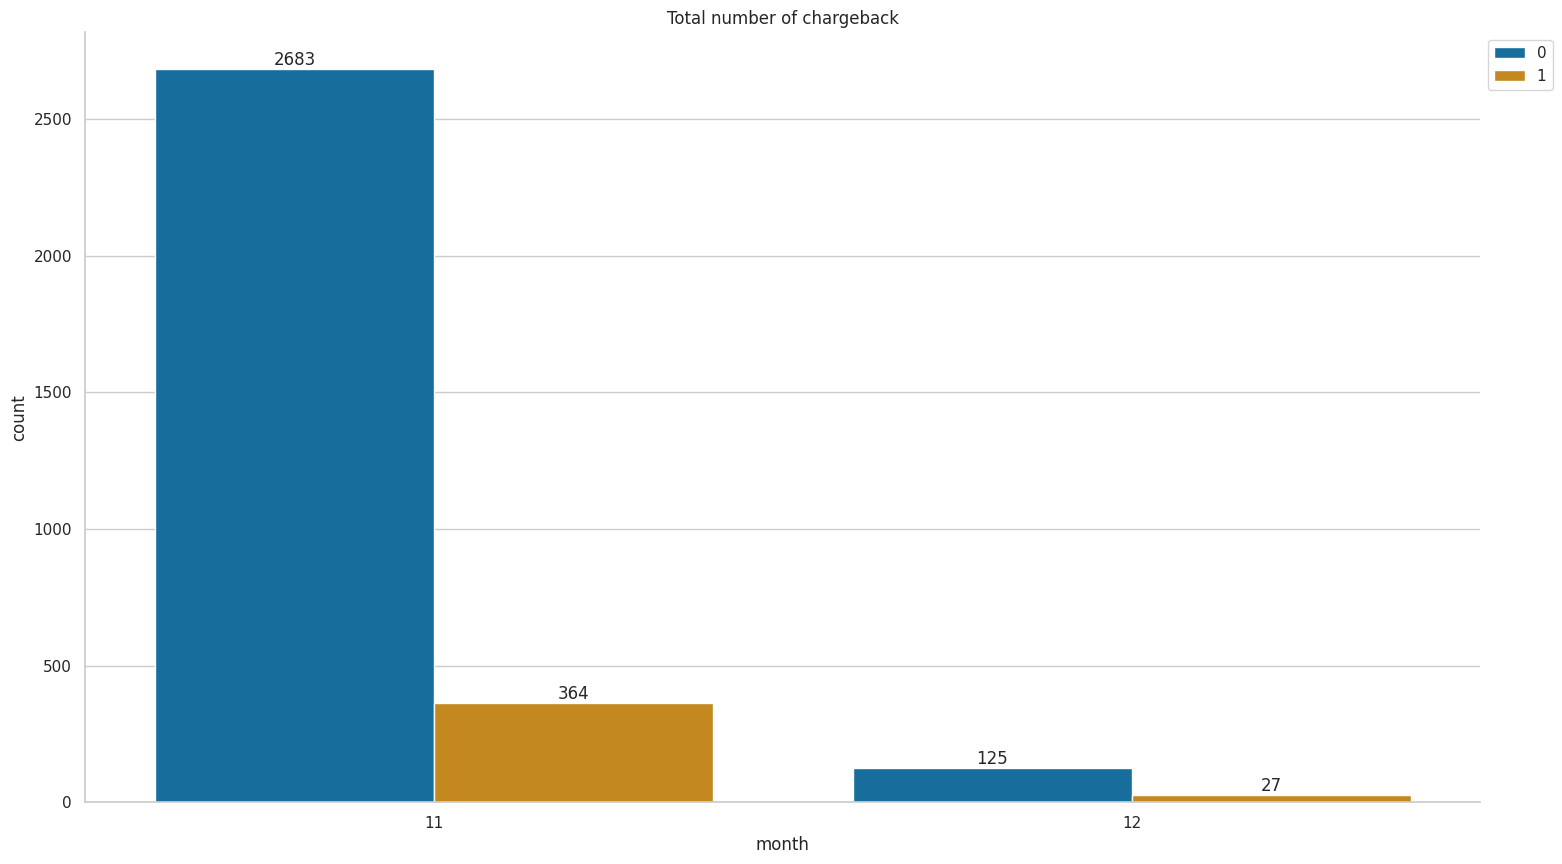

In [534]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data=df, x="month", hue="has_cbk")
for label in ax.containers:
  ax.bar_label(label)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Total number of chargeback")
plt.show()


temos no nosso dataset um total de 12.22% de chargebacks

In [495]:
(df["has_cbk"].value_counts(normalize=True)*100).to_frame("charge_backs").round(2)

,charge_backs
0,87.78
1,12.22


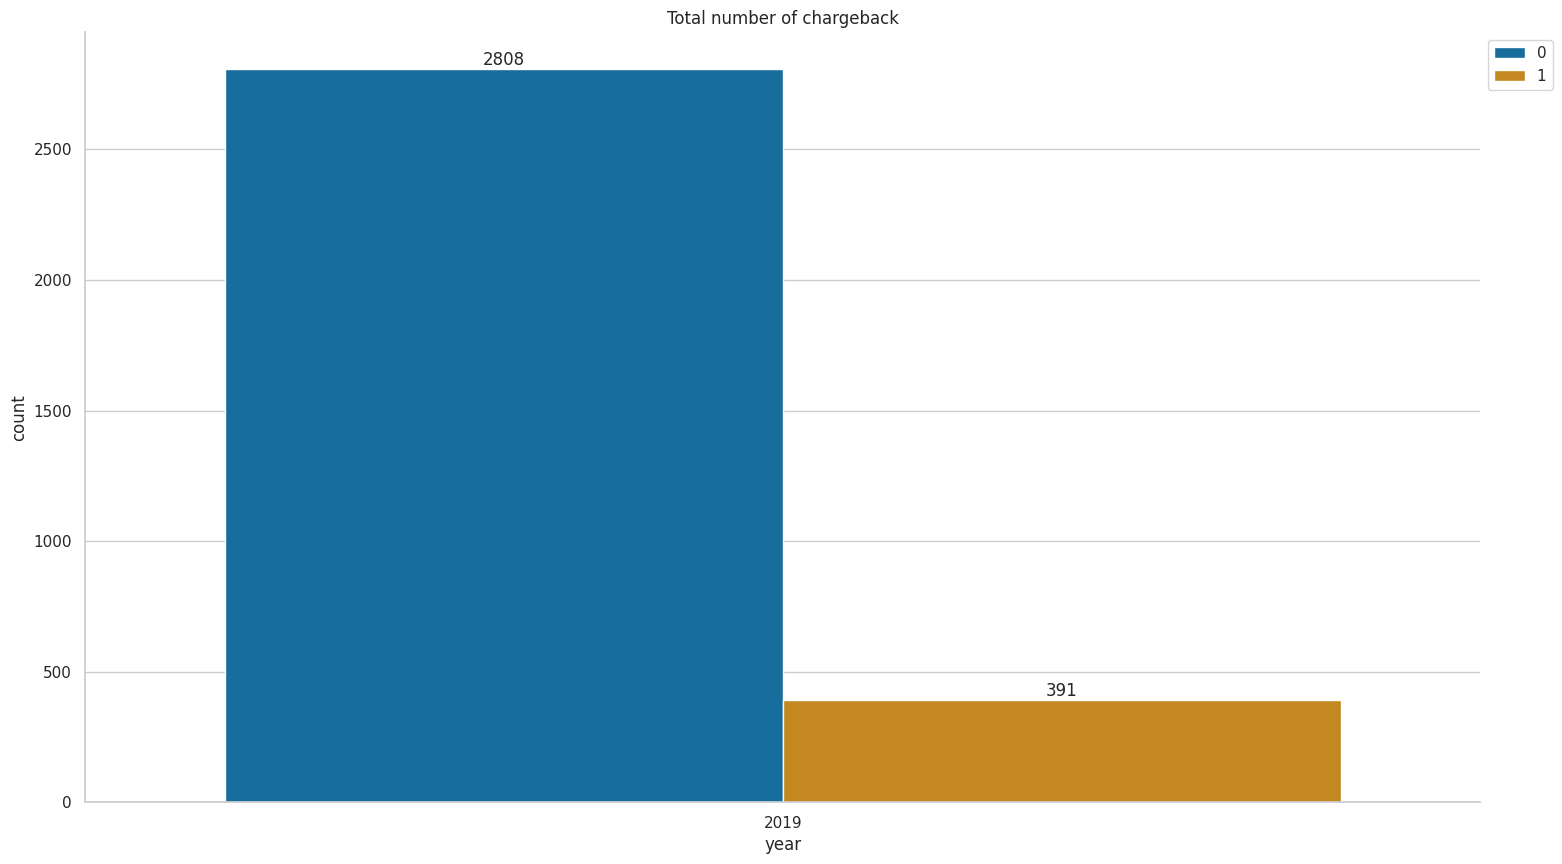

In [535]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data=df, x="year", hue="has_cbk")
for label in ax.containers:
  ax.bar_label(label)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.title("Total number of chargeback")
plt.show()

In [536]:
df.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0,2019-12-01,2019,12,1,6,23,16,Sunday


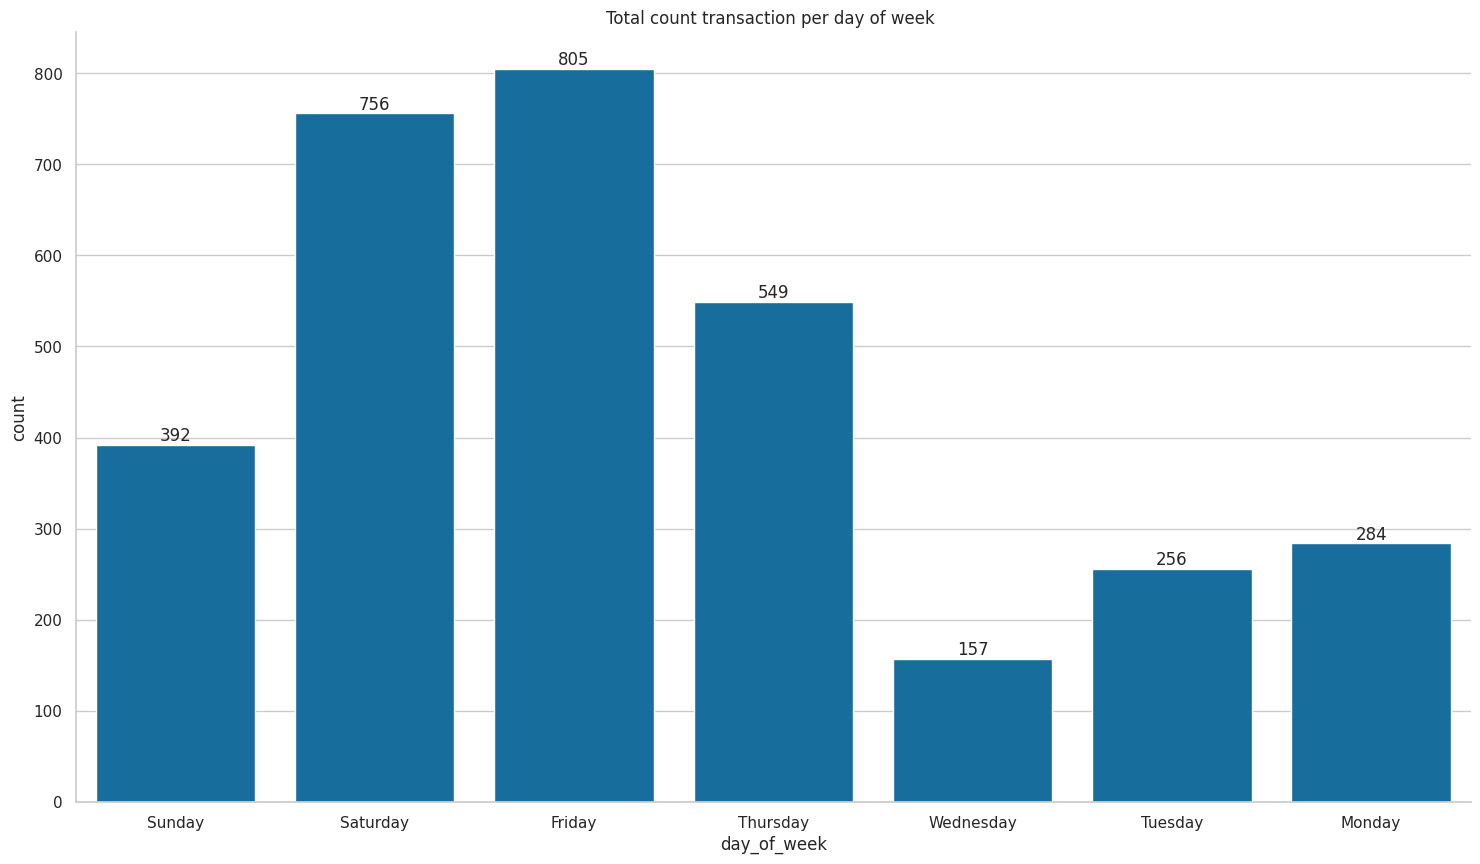

In [541]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data=df, x="day_of_week")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Total count transaction per day of week ")
plt.show()

In [498]:
df.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0,2019-12-01,2019,12,1,6,23,16,Sunday


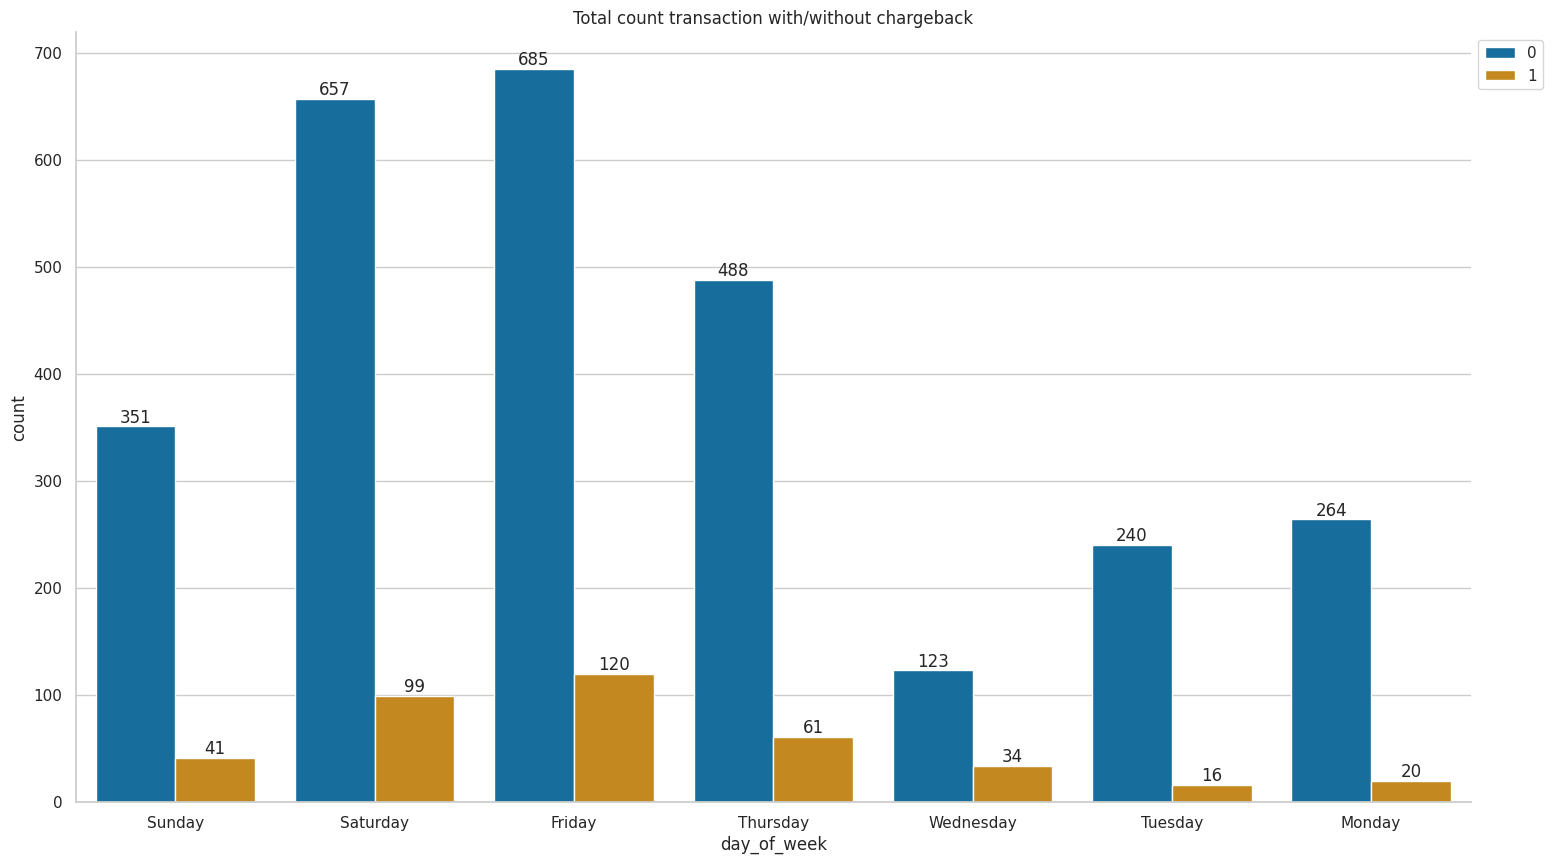

In [542]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data=df, x="day_of_week", hue="has_cbk")
for label in ax.containers:
  ax.bar_label(label)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Total count transaction with/without chargeback")
plt.show()


In [500]:
count_cbk=(df.groupby(["has_cbk","day_of_week"]).agg(count_cbk=("has_cbk","count")).reset_index().sort_values("day_of_week"))
no_cbk=count_cbk[count_cbk["has_cbk"]==0]
no_cbk["pct_count_cbk"]=no_cbk["count_cbk"].apply(lambda x :(x/no_cbk["count_cbk"].sum())*100).round(1)
no_cbk=no_cbk.sort_values("pct_count_cbk",ascending=False)

no_cbk

,has_cbk,day_of_week,count_cbk,pct_count_cbk
0,0,Friday,685,24.4
2,0,Saturday,657,23.4
4,0,Thursday,488,17.4
3,0,Sunday,351,12.5
1,0,Monday,264,9.4
5,0,Tuesday,240,8.5
6,0,Wednesday,123,4.4


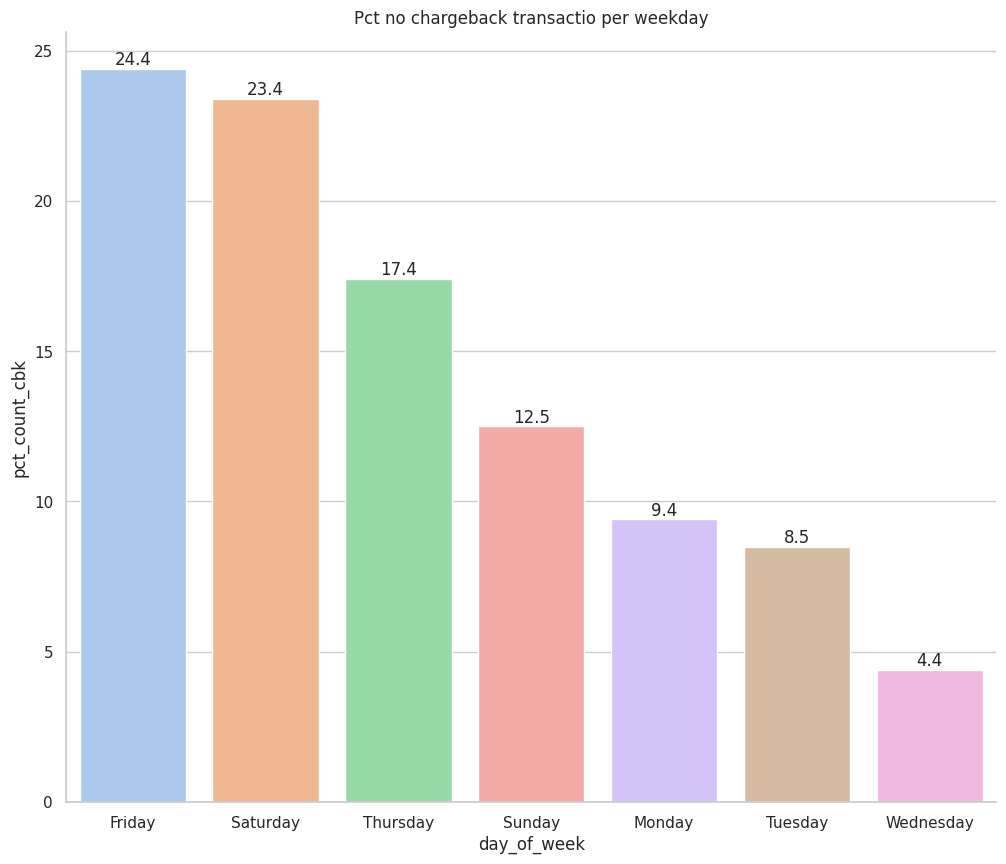

In [501]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data=no_cbk,x="day_of_week",y="pct_count_cbk",palette="pastel")
for label in ax.containers:
    ax.bar_label(label)

plt.title("Pct no chargeback transactio per weekday")
plt.show()



In [502]:
df.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0,2019-12-01,2019,12,1,6,23,16,Sunday


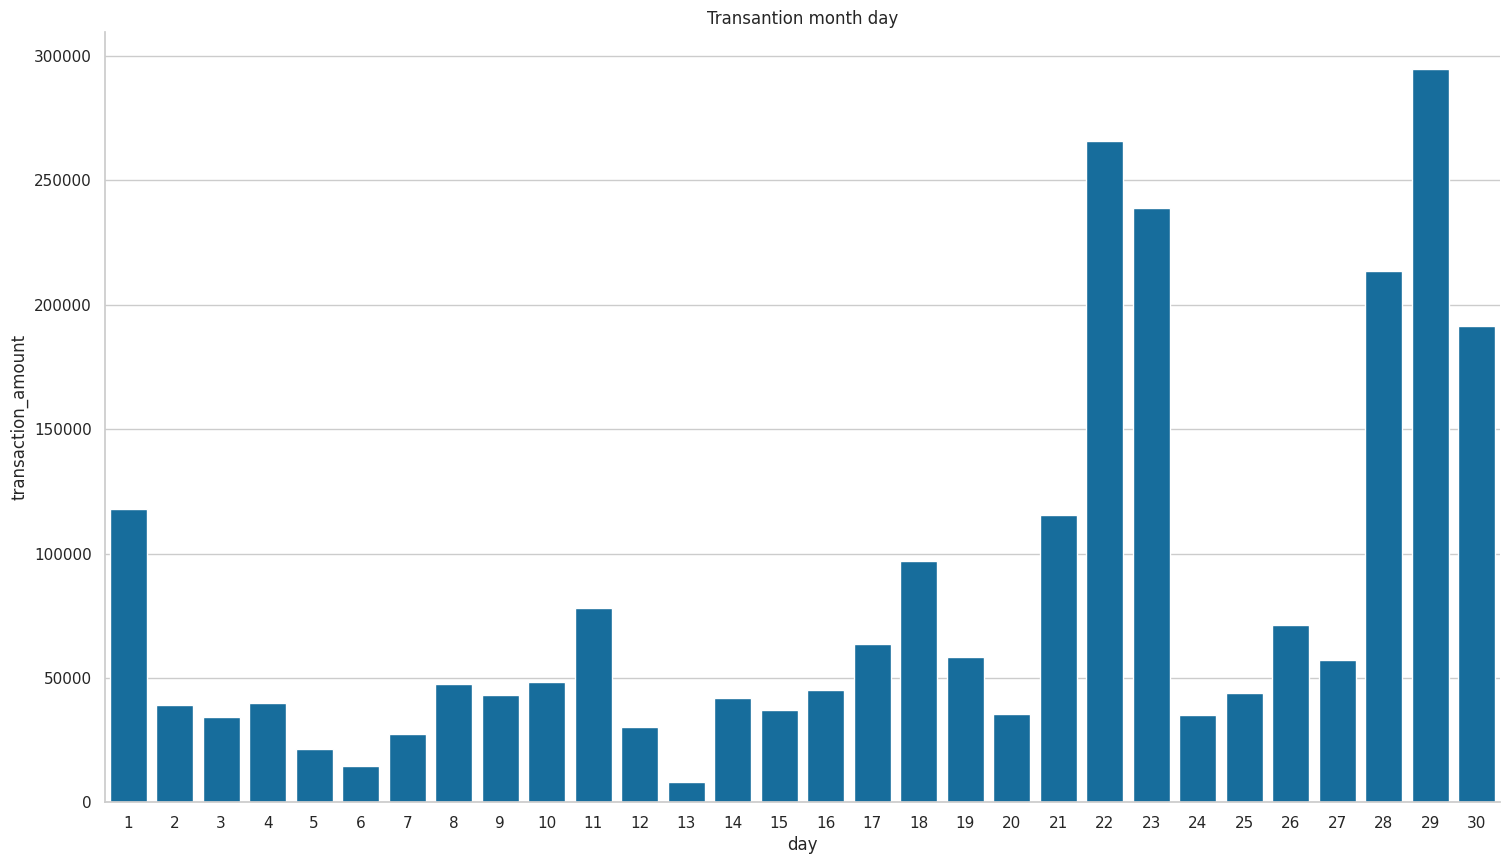

In [503]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="day", y="transaction_amount",estimator="sum", errorbar=None)
plt.title("Transantion month day")
plt.xticks(rotation=360);


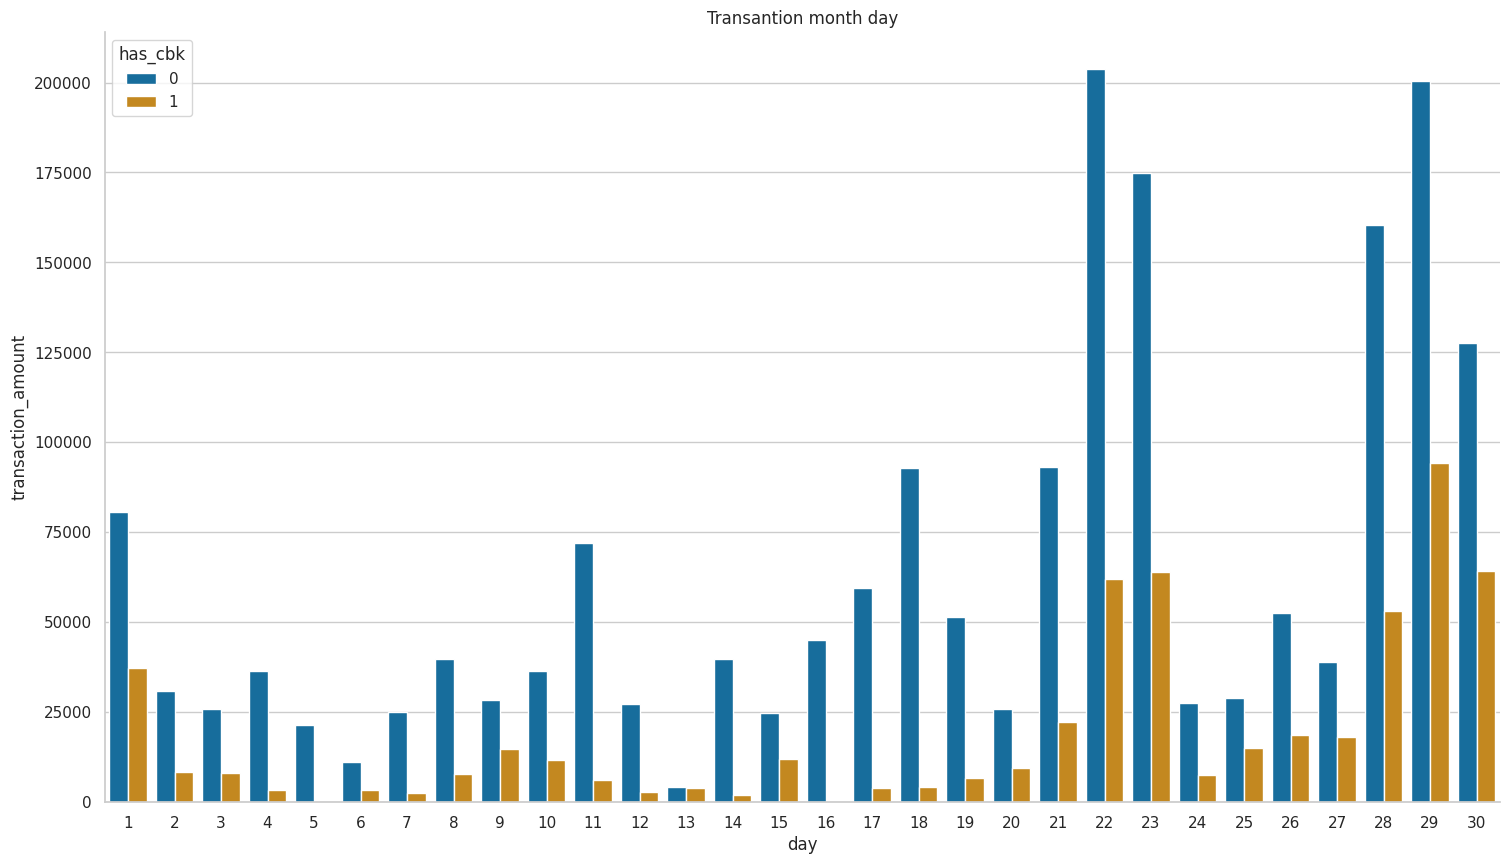

In [543]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="day", y="transaction_amount",estimator="sum", errorbar=None, hue="has_cbk")
plt.title("Transantion month day")
plt.xticks(rotation=360);

In [504]:
cbk=(df.groupby("day_of_week").agg(count_cbk=("has_cbk","count")).reset_index().sort_values("day_of_week"))

cbk["pct_count_cbk"]=cbk["count_cbk"].apply(lambda x :(x/cbk["count_cbk"].sum())*100).round(1)
cbk=cbk.sort_values("pct_count_cbk",ascending=False)
cbk

,day_of_week,count_cbk,pct_count_cbk
0,Friday,805,25.2
2,Saturday,756,23.6
4,Thursday,549,17.2
3,Sunday,392,12.3
1,Monday,284,8.9
5,Tuesday,256,8.0
6,Wednesday,157,4.9


In [505]:
cbk=(df.groupby(["has_cbk","day_of_week"]).agg(count_cbk=("has_cbk","count")).reset_index().sort_values("day_of_week"))
with_bk=cbk[cbk["has_cbk"]==1]
with_bk["pct_count_cbk"]=with_bk["count_cbk"].apply(lambda x :(x/with_bk["count_cbk"].sum())*100).round(1)
with_bk=with_bk.sort_values("pct_count_cbk",ascending=False)
with_bk

,has_cbk,day_of_week,count_cbk,pct_count_cbk
7,1,Friday,120,30.7
9,1,Saturday,99,25.3
11,1,Thursday,61,15.6
10,1,Sunday,41,10.5
13,1,Wednesday,34,8.7
8,1,Monday,20,5.1
12,1,Tuesday,16,4.1


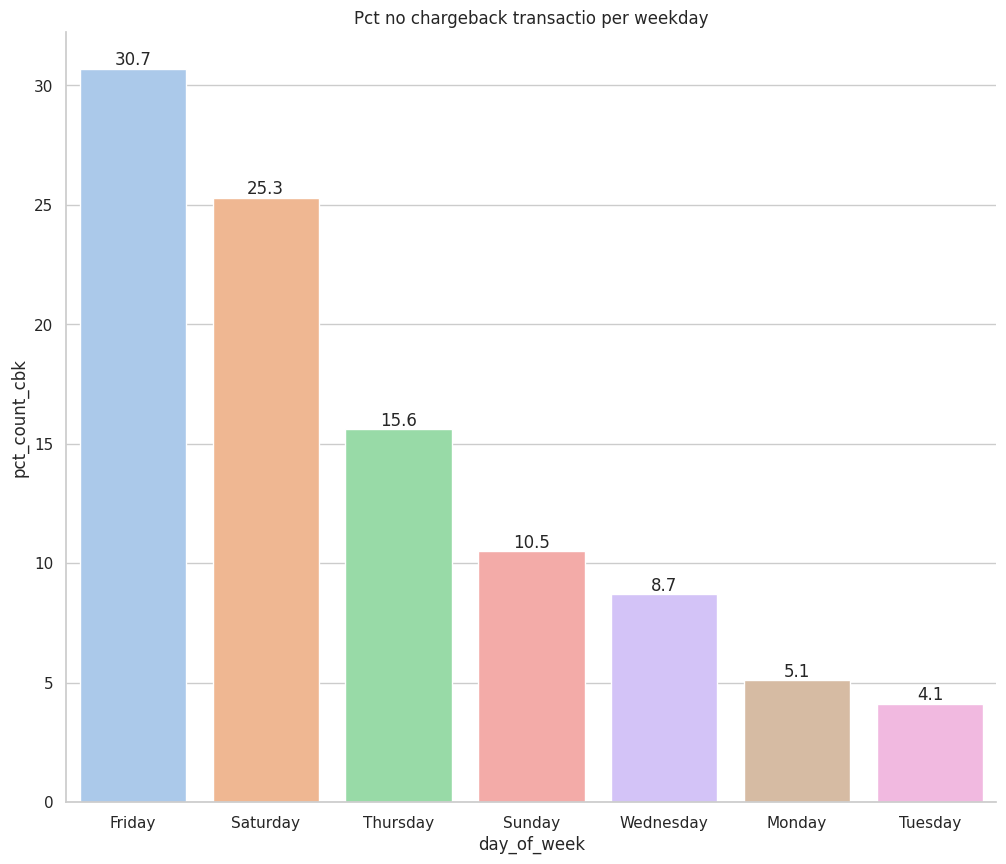

In [506]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data=with_bk,x="day_of_week",y="pct_count_cbk",palette="pastel")
for label in ax.containers:
    ax.bar_label(label)

plt.title("Pct no chargeback transactio per weekday")
plt.show()

In [507]:
df.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0,2019-12-01,2019,12,1,6,23,16,Sunday


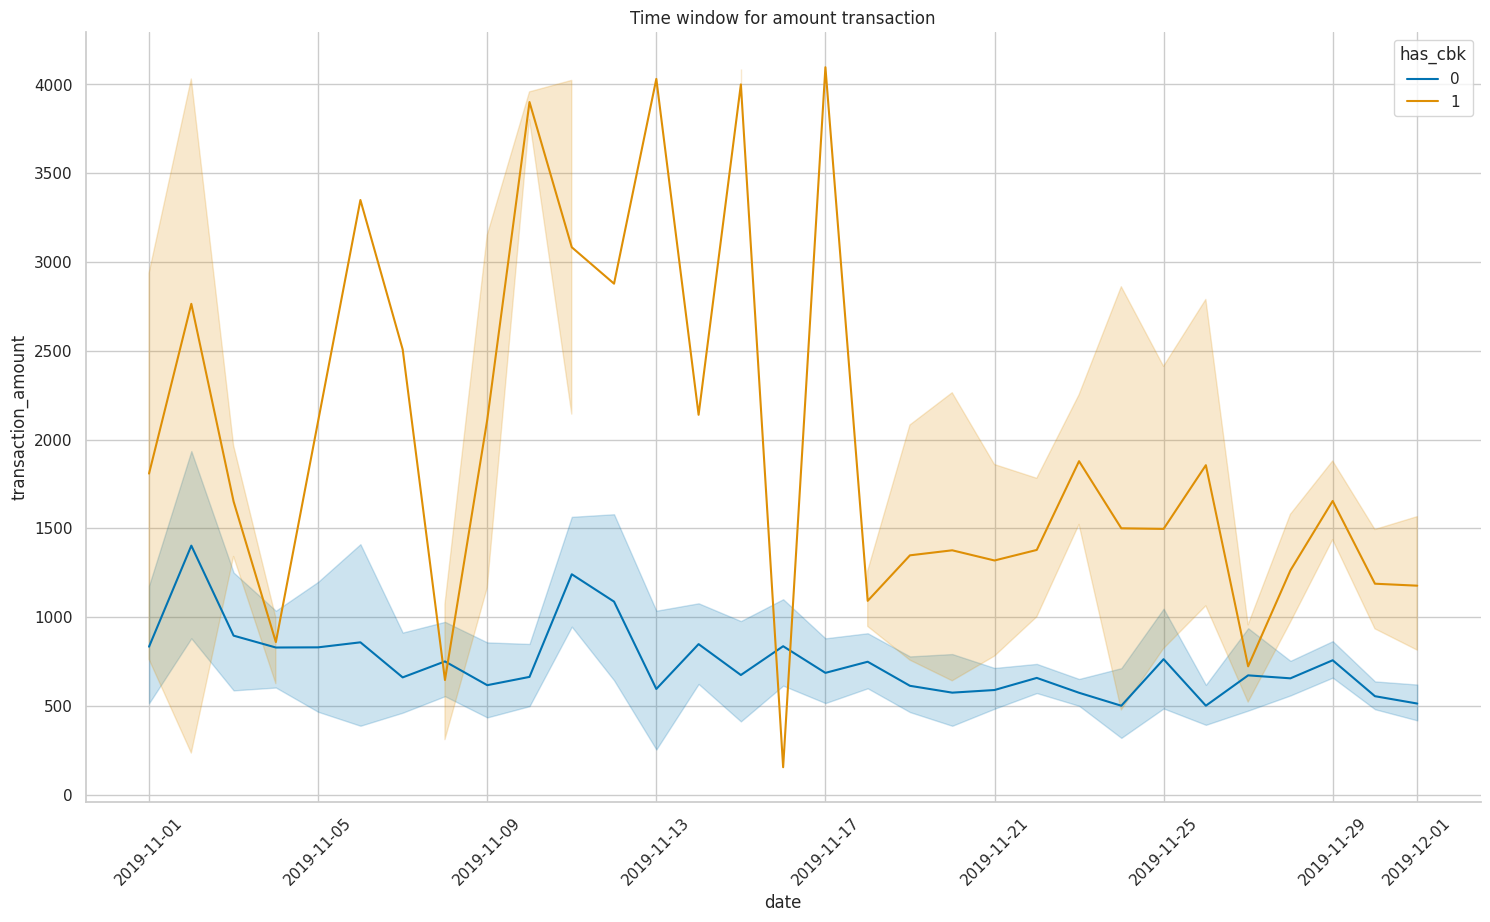

In [508]:
plt.figure(figsize=(18,10))
sns.lineplot(data=df, x="date",y="transaction_amount", hue="has_cbk")
plt.title("Time window for amount transaction")
plt.xticks(rotation=45)
plt.show()


In [509]:
df["day_of_week"].apply(lambda x :0 if x == False else 1)

0       1
1       1
2       1
3       1
4       1
       ..
3194    1
3195    1
3196    1
3197    1
3198    1
Name: day_of_week, Length: 3199, dtype: int64

0->monday, 1->tuesday, 2-wendesday, 3->thursday, 4->friday, 5->saturday, 6->sunday

horarios de 19:00, 21:00, 20:00, 23:00, 17:00, 16:00 totalizam 56% do todas a faudes com horarios criticos em quantidade de transacaoes
---



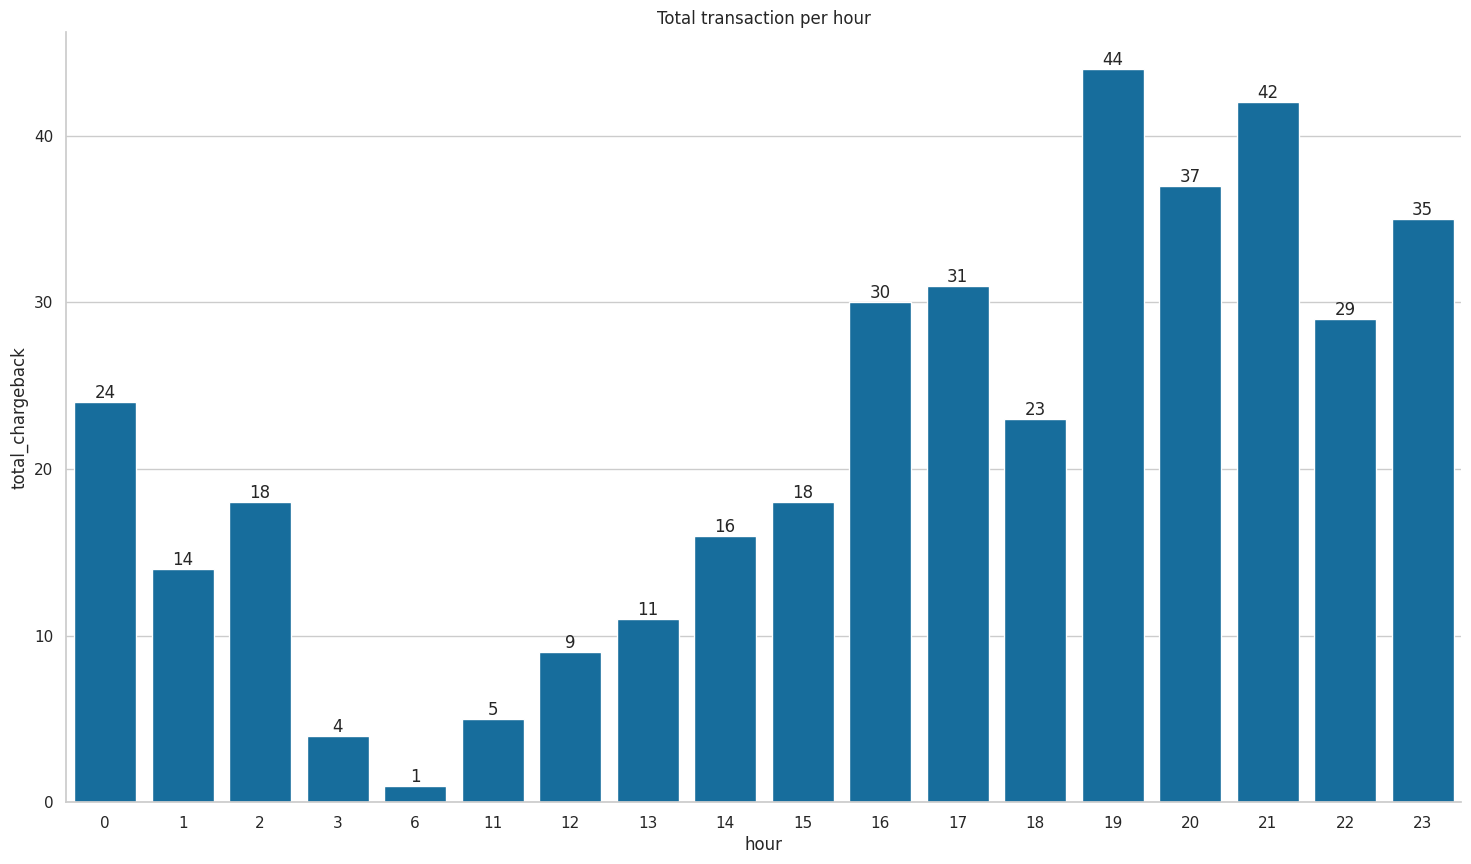

In [585]:
chargeback_time=(df.loc[df["has_cbk"]==1].groupby(["hour","has_cbk"]).agg(total_chargeback=("hour","count"))
.reset_index()
.sort_values(by="has_cbk", ascending=False)
).sort_values("total_chargeback", ascending=False)

chargeback_time["total_chargeback"].sum()
chargeback_time['percentage_total_amount'] = chargeback_time['total_chargeback'].apply(lambda x: (x / chargeback_time["total_chargeback"].sum()) * 100)
chargeback_time["cum_sum"]=chargeback_time['percentage_total_amount'].cumsum()
chargeback_time.head(10)
plt.figure(figsize=(18,10))
ax=sns.barplot(data=chargeback_time,x="hour", y="total_chargeback")
for label in ax.containers:
    ax.bar_label(label)

plt.title("Total transaction per hour")
plt.show()

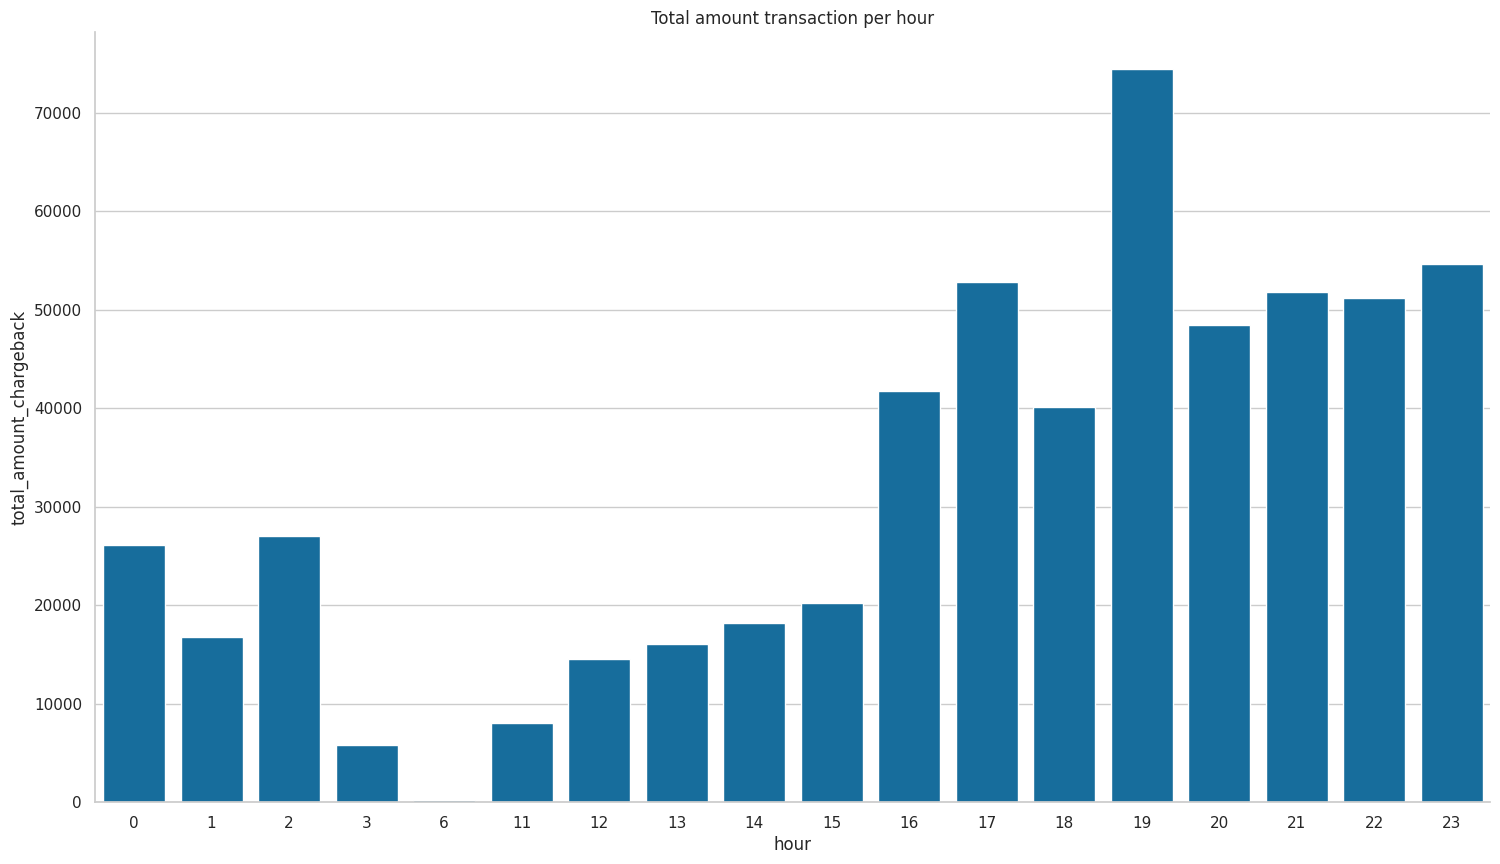

In [583]:
chargeback_time_amount = (df.groupby(["hour", "has_cbk"])
                          .agg(mean_amount_chargeback=("transaction_amount", "mean"),
                               total_amount_chargeback=("transaction_amount", "sum"))
                          .reset_index()
                          .sort_values(by="has_cbk", ascending=False)).head(18)

total = chargeback_time_amount["total_amount_chargeback"].sum()
chargeback_time_amount = chargeback_time_amount.sort_values("total_amount_chargeback", ascending=False)
chargeback_time_amount['percentage_total_amount'] = chargeback_time_amount['total_amount_chargeback'].apply(lambda x: (x / total) * 100)


chargeback_time_amount["cumsum"]=chargeback_time_amount["percentage_total_amount"].cumsum()
chargeback_time_amount.head(10)

plt.figure(figsize=(18,10))
sns.barplot(data=chargeback_time_amount,x="hour", y="total_amount_chargeback")
plt.title("Total amount transaction per hour")
plt.show()

POdemos notar que horarios criticos unindo as duas tabelas analisando numero de trasancaoes e valor monetarios os 5 horarios que precisamos acionar sinal de alerta seriam os seguintes horarios 19:00, 23:00, 17:00, 21, 20

In [512]:
new_df=pd.merge(chargeback_time,chargeback_time_amount, how="inner",on="hour").drop(columns=["has_cbk_y"])
new_df.head(5).sort_values("total_amount_chargeback", ascending=False)

,hour,has_cbk_x,total_chargeback,percentage_total_amount_x,cum_sum,mean_amount_chargeback,total_amount_chargeback,percentage_total_amount_y,cumsum
0,19,1,44,11.253197,11.253197,1691.872727,74442.40,13.098063,13.098063
3,23,1,35,8.951407,40.409207,1560.432286,54615.13,9.609476,22.707539
4,17,1,31,7.928389,48.337596,1702.946129,52791.33,9.288580,31.996119
1,21,1,42,10.741688,21.994885,1232.215000,51753.03,9.105892,41.102011
2,20,1,37,9.462916,31.457801,1310.453243,48486.77,8.531197,58.642710


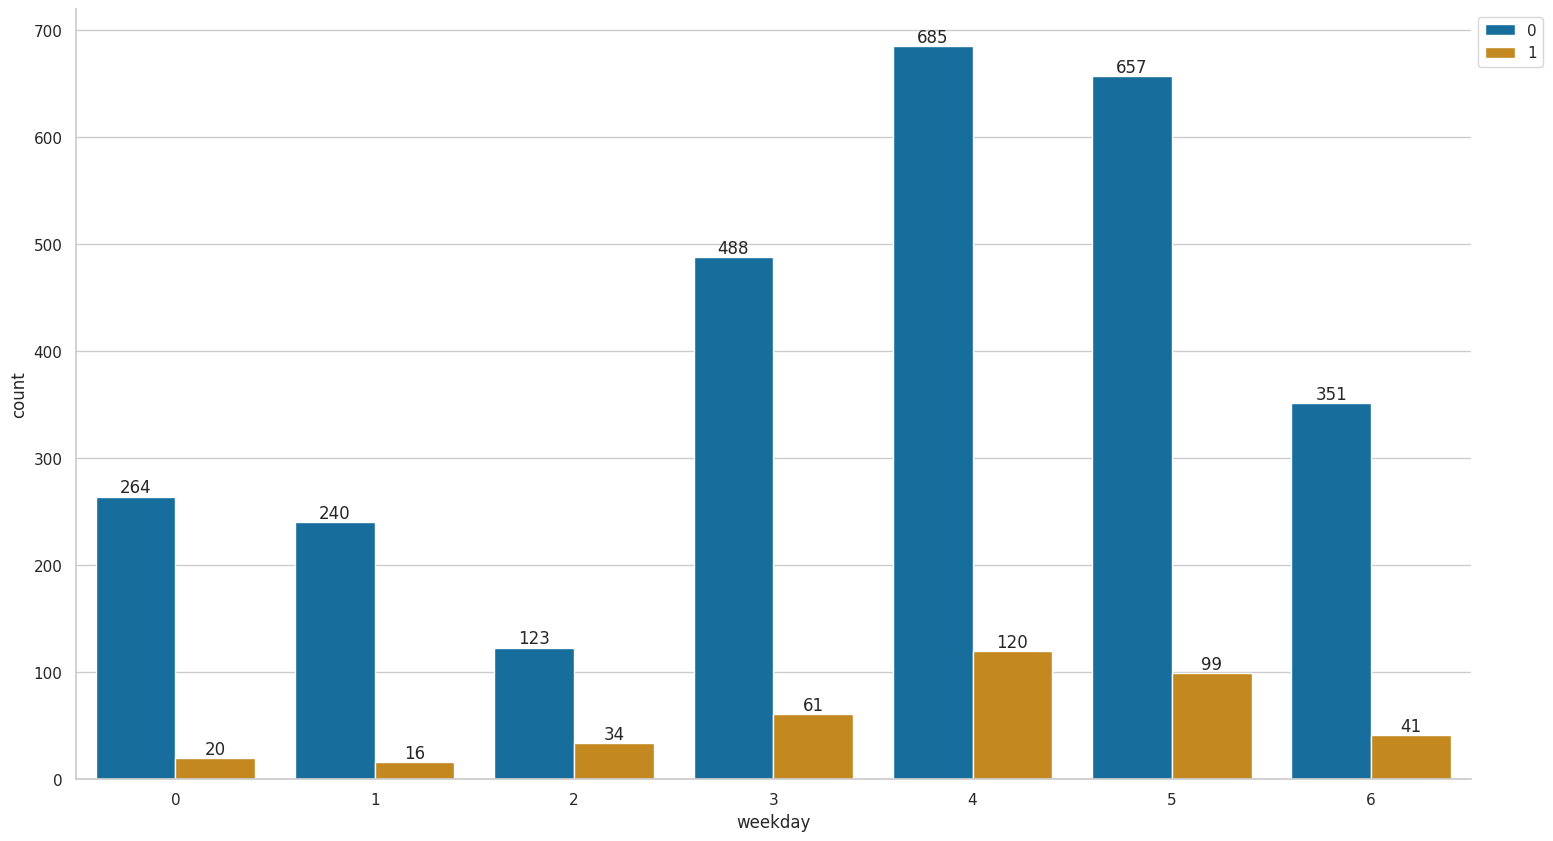

In [513]:
plt.figure(figsize=(18,10))
ax=sns.countplot(data=df, x="weekday", hue="has_cbk")
for label in ax.containers:
  ax.bar_label(label)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Text(0.5, 1.0, 'Histogram transaction amount')

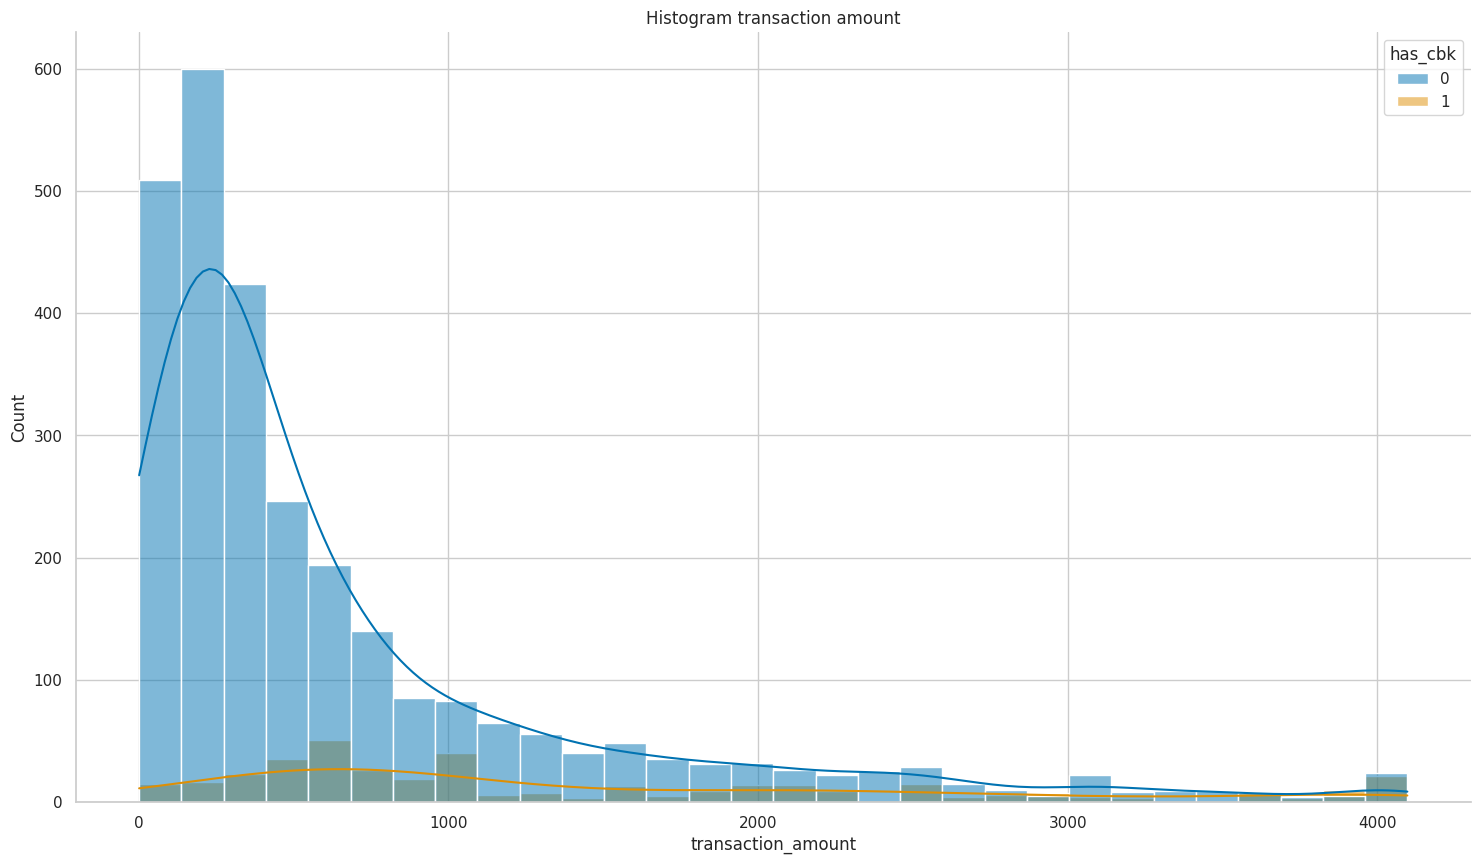

In [544]:
plt.figure(figsize=(18,10))
sns.histplot(data=df, x="transaction_amount", bins=30,hue="has_cbk", kde=True)
plt.title("Histogram transaction amount")

Text(0.5, 1.0, 'Data distribution')

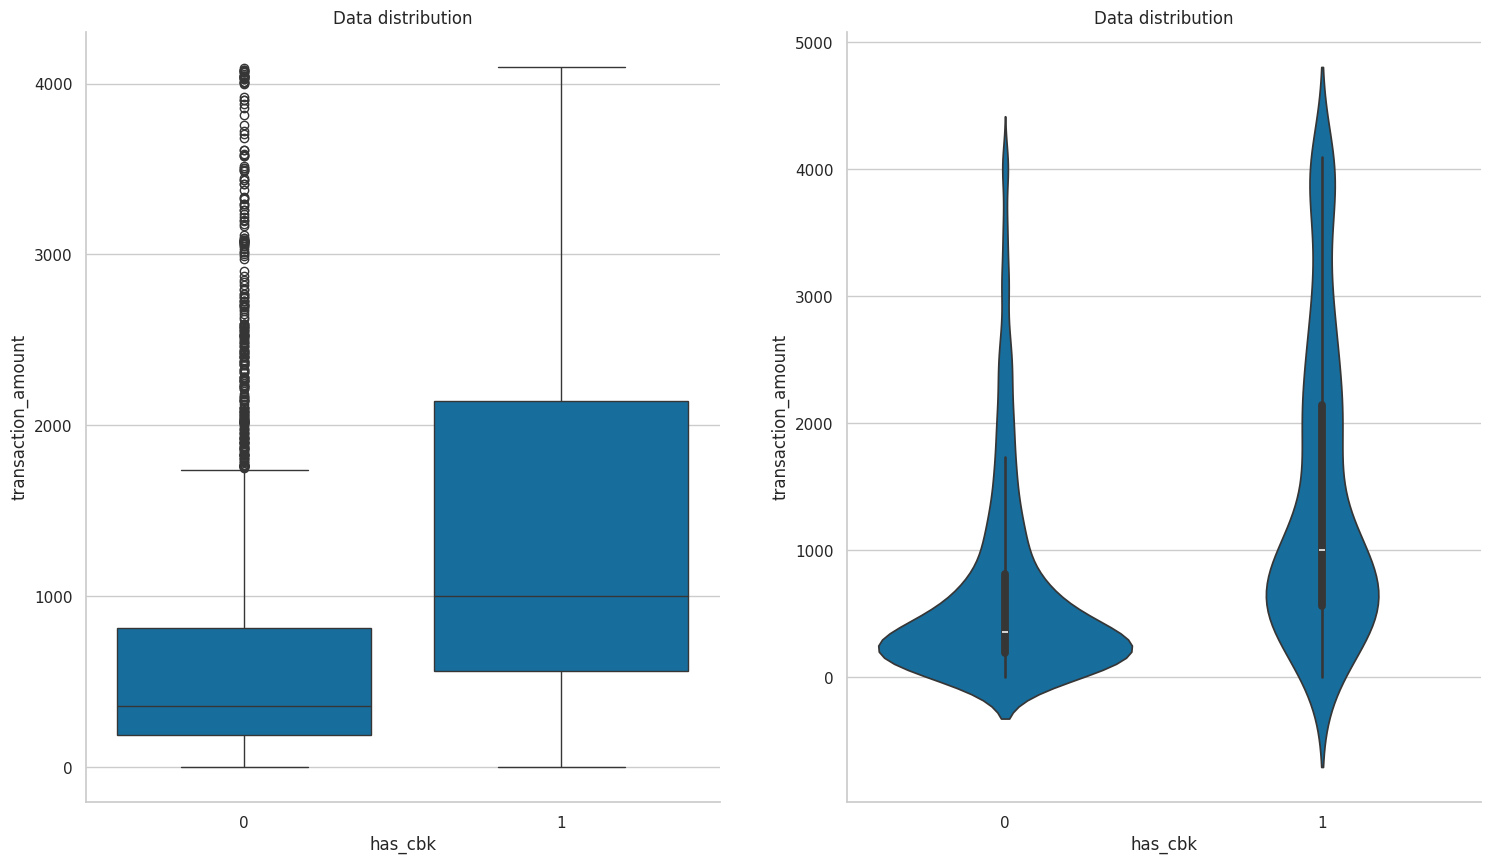

In [548]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(data=df, x="has_cbk", y="transaction_amount", ax=ax1)
ax1.set_title("Data distribution", loc='center')

sns.violinplot(data=df, x="has_cbk", y="transaction_amount", ax=ax2)
ax2.set_title("Data distribution", loc='center')



## Analysing merchant_id for any pattern

In [550]:
#the most frequent merchant is merchant no.49205
df_merch_freq=df["merchant_id"].value_counts().to_frame(name="count_merchant").head(30)
df_merch_freq["pct"]=df_merch_freq["count_merchant"]/df_merch_freq["count_merchant"].sum()*100
df_merch_freq["cumsum"]=df_merch_freq["pct"].cumsum()
df_merch_freq=df_merch_freq.head(10)



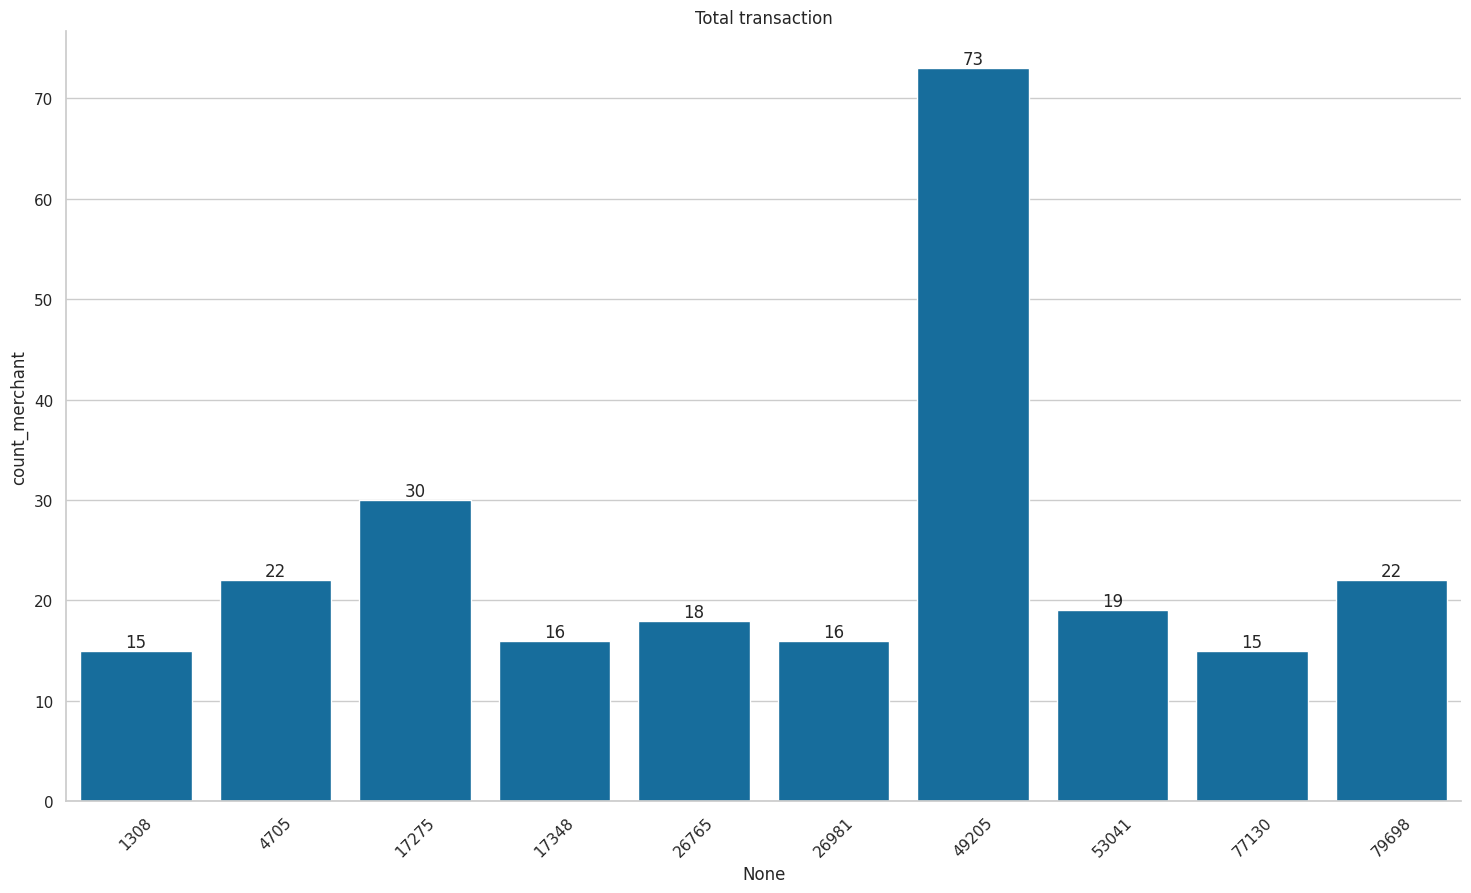

In [553]:
plt.figure(figsize=(18,10))
ax=sns.barplot(data=df_merch_freq, x=df_merch_freq.index, y="count_merchant")
plt.xticks(rotation=45)

for label in ax.containers:
  ax.bar_label(label)
plt.title("Total transaction")
plt.show()


In [557]:
'''o merchant_id "91972" corresponde um total de 1.618%
de toda a nossa transacao sem ter distincao se as trasacoes
sao chargebacks ou nao
'''
result=(
df.groupby("merchant_id")
.agg(total_amount=("transaction_amount","sum"),
    mean_transaction=("transaction_amount","mean"))
.sort_values(by="total_amount", ascending=False)
).head(30)

total_sum = result['total_amount'].sum()
result['percentage_total_amount'] = result['total_amount'].apply(lambda x: (x / total_sum) * 100).round(2)
result["cumsum"]=result["percentage_total_amount"].cumsum()
result.head(8)

,total_amount,mean_transaction,percentage_total_amount,cumsum
merchant_id,,,,
91972,39754.74,2839.624286,7.57,7.57
1308,34517.94,2301.196000,6.57,14.14
36929,33050.32,2542.332308,6.29,20.43
65330,32673.95,3267.395000,6.22,26.65
17348,32503.23,2031.451875,6.19,32.84
49919,28689.79,3586.223750,5.46,38.30
49205,27589.79,377.942329,5.25,43.55
53041,21079.55,1109.450000,4.01,47.56


In [519]:
# filtrando apenas linhas que sao cashback
df_fraud=df[df["has_cbk"]==1]

In [520]:
#o merchant_id apresentou percentualmente maior numero de chargeback com 6.2%
# os 15 primeiros merchant_ids analaisados correspondem aaproximadamente 46% de todos os
#valores fraudados

result_fraud=(
df_fraud.groupby("merchant_id")
.agg(total_amount=("transaction_amount","sum"),
    mean_transaction=("transaction_amount","mean"))
.sort_values(by="total_amount", ascending=False)
 )
total_sum = result_fraud['total_amount'].sum()
result_fraud['percentage_total_amount'] = result_fraud['total_amount'].apply(lambda x: (x / total_sum) * 100)
result_fraud["cumsum"]=result_fraud["percentage_total_amount"].cumsum()
result_fraud.head(15)




,total_amount,mean_transaction,percentage_total_amount,cumsum
merchant_id,,,,
91972,35528.44,3229.858182,6.251192,6.251192
1308,34517.94,2301.196000,6.073396,12.324588
49919,27764.86,3966.408571,4.885198,17.209787
65330,26656.72,3332.090000,4.690222,21.900009
75917,15585.84,2597.640000,2.742312,24.642321
4705,15352.11,808.005789,2.701188,27.343509
73271,14577.57,1457.757000,2.564908,29.908418
17275,12952.25,588.738636,2.278935,32.187352
36700,12687.48,2537.496000,2.232349,34.419701


In [521]:
# undestanding total cashback x no cashback
count_fraud=df_fraud.groupby("merchant_id").agg(total_fraud=("has_cbk","count"))

In [522]:
count_all=df.groupby("merchant_id").agg(total=("has_cbk","count"))

Dos 30 com maior quantidade de transacoes que sao consideradas fraudulentas, merchant_id 17275 apresenta 22 transacoes fraudulentas, de um total de 30 transacoes, totalizando 73% de todas elas. E dentro das 30 top quantidade de transacoes fraudulentas 9 transacoes ja correspondem a 50% das transacoes consideradas fraudulentas


In [571]:
df_compare=pd.merge(count_fraud,count_all, on="merchant_id",how="inner")
df_compare.sort_values(by="total", ascending=False)
df_compare["pecr"]=df_compare["total_fraud"]/df_compare["total"]
df_compare=df_compare.sort_values(by="total_fraud",ascending=False).head(30)

df_compare["fraud_perc"]=df_compare["total_fraud"].apply(lambda x:(x/df_compare["total_fraud"].sum())*100).cumsum()
df_plot=df_compare.head(9)
df_plot

,total_fraud,total,pecr,fraud_perc
merchant_id,,,,
17275,22,30,0.733333,8.943089
4705,19,22,0.863636,16.666667
1308,15,15,1.000000,22.764228
53041,14,19,0.736842,28.455285
77130,13,15,0.866667,33.739837
44927,11,11,1.000000,38.211382
91972,11,14,0.785714,42.682927
73271,10,10,1.000000,46.747967
55854,9,11,0.818182,50.406504


Text(0.5, 1.0, 'Total Fraud Transaction')

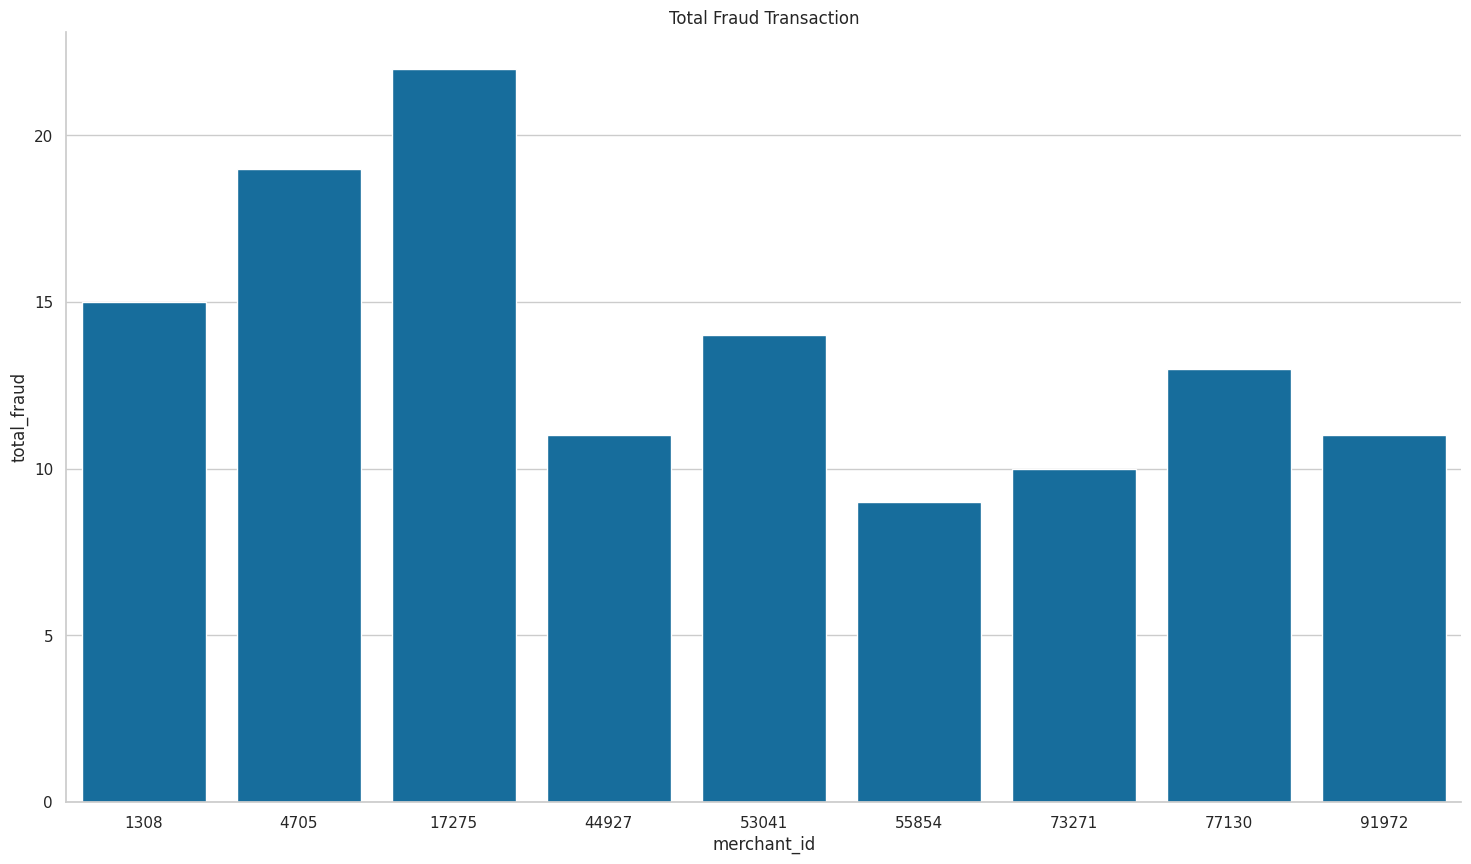

In [575]:
plt.figure(figsize=(18,10))
sns.barplot(data=df_plot, x=df_plot.index, y="total_fraud")
plt.title("Total Fraud Transaction")

In [561]:
qt_device=df_fraud.groupby("merchant_id").agg(qtd_device=("device_id","nunique")).sort_values(by="qtd_device", ascending=False)

In [562]:
pd.merge(df_compare,qt_device, how="inner", on="merchant_id" )

,total_fraud,total,pecr,fraud_perc,qtd_device
merchant_id,,,,,
17275,22,30,0.733333,8.943089,4
4705,19,22,0.863636,16.666667,1
1308,15,15,1.000000,22.764228,2
53041,14,19,0.736842,28.455285,6
77130,13,15,0.866667,33.739837,0
44927,11,11,1.000000,38.211382,3
91972,11,14,0.785714,42.682927,7
73271,10,10,1.000000,46.747967,4
55854,9,11,0.818182,50.406504,3


# User_ID

In [526]:
(
df_fraud.groupby(["merchant_id","user_id"]).agg(qtd_usuario=("transaction_amount","sum"),
                                                qtd_maquina=("device_id","count"))
.sort_values(by="qtd_usuario", ascending=False)
)

,,qtd_usuario,qtd_maquina
merchant_id,user_id,,
1308,96025,23997.62,10
65330,78262,23918.05,7
4705,91637,15352.11,19
75917,17929,13913.81,4
39253,67519,11576.05,4
...,...,...,...
71378,9853,61.94,3
92215,80769,50.66,0
1017,19199,10.87,1


In [527]:
df_fraud.loc[df_fraud["user_id"]==96025]

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
565,21320963,1308,96025,406655******4980,2019-11-29T17:49:01.844537,2141.93,438940.0,1,2019-11-29,2019,11,29,4,17,49,Friday
569,21320967,1308,96025,406655******7343,2019-11-29T17:42:40.460221,2259.99,438940.0,1,2019-11-29,2019,11,29,4,17,42,Friday
596,21320994,1308,96025,406655******7343,2019-11-29T16:46:59.421700,2288.47,438940.0,1,2019-11-29,2019,11,29,4,16,46,Friday
603,21321001,1308,96025,406655******4980,2019-11-29T16:36:00.073092,2261.25,438940.0,1,2019-11-29,2019,11,29,4,16,36,Friday
709,21321107,1308,96025,406655******5764,2019-11-29T11:32:14.313926,2412.28,438940.0,1,2019-11-29,2019,11,29,4,11,32,Friday
723,21321121,1308,96025,406655******5764,2019-11-29T03:30:43.934091,2486.70,438940.0,1,2019-11-29,2019,11,29,4,3,30,Friday
724,21321122,1308,96025,406655******4572,2019-11-29T03:17:30.558440,1648.30,438940.0,1,2019-11-29,2019,11,29,4,3,17,Friday
729,21321127,1308,96025,406655******5764,2019-11-29T02:35:55.206318,2774.51,438940.0,1,2019-11-29,2019,11,29,4,2,35,Friday
731,21321129,1308,96025,406655******4608,2019-11-29T02:10:25.828340,2819.59,438940.0,1,2019-11-29,2019,11,29,4,2,10,Friday
734,21321132,1308,96025,406655******5763,2019-11-29T02:02:30.874661,2904.60,438940.0,1,2019-11-29,2019,11,29,4,2,2,Friday


HIGHER TRANSACTION AMOUNT AND MORE DEVICE_ID, will be a high alert and priority to check the risk for fraud


In [528]:
qtd_user_ckb=(
df.groupby(["merchant_id","user_id","has_cbk"]).agg(trans_amount=("transaction_amount","sum"),
                                                qtd_maquina=("device_id","nunique"),
                                                total_passagens=('transaction_date',"count"))
.sort_values(by="total_passagens", ascending=False)
.reset_index()
).head(10)
qtd_user_ckb

,merchant_id,user_id,has_cbk,trans_amount,qtd_maquina,total_passagens
0,4705,91637,1,15352.11,1,19
1,17275,11750,1,10504.73,3,18
2,1308,96025,1,23997.62,1,10
3,77130,75710,1,5613.81,0,10
4,65330,78262,1,23918.05,1,7
5,66876,11750,1,4395.20,1,7
6,36929,49106,0,25587.45,0,7
7,73271,7725,1,10822.94,2,7
8,33192,34548,0,1889.77,2,6
9,704,67245,0,3505.97,1,5


In [590]:
user_fraud=(df[df["has_cbk"]==1].groupby("user_id").agg(qtd_passagens=("user_id","count"),
                                                        total_prejuizo=("transaction_amount","sum")).sort_values("qtd_passagens", ascending=False))

user=df.groupby("user_id").agg(qtd_passagens_norm=("user_id","count")).sort_values("qtd_passagens_norm", ascending=False)
total_passagem=pd.merge(user_fraud, user, how="inner", on="user_id").head(30)

total_passagem["cumsum"]=(total_passagem['total_prejuizo']
                          .apply(lambda x :(x/total_passagem['total_prejuizo']
                                            .sum())*100)
                          .round(2)
                          .cumsum())
total_passagem["pct"]=(total_passagem['total_prejuizo']
                          .apply(lambda x :(x/total_passagem['total_prejuizo']
                                            .sum())*100)
                          .round(2))
total_passagem.head(6)


,qtd_passagens,total_prejuizo,qtd_passagens_norm,cumsum,pct
user_id,,,,,
11750,25,14899.93,31,5.66,5.66
91637,19,15352.11,22,11.49,5.83
79054,15,30360.31,17,23.02,11.53
96025,13,30149.51,14,34.47,11.45
78262,12,35198.34,13,47.83,13.36
75710,10,5613.81,10,49.96,2.13


# Device_id

In [530]:
df.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,date,year,month,day,weekday,hour,min,day_of_week
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0,2019-12-01,2019,12,1,6,23,16,Sunday


In [576]:
df.loc[df['has_cbk']==1].groupby(["device_id","user_id","merchant_id"]).agg(total_transaction=("transaction_amount","sum"))\
.sort_values("total_transaction", ascending=False).head(20)

,,,total_transaction
device_id,user_id,merchant_id,
438940.0,96025,1308,23997.62
547440.0,78262,65330,23918.05
563499.0,91637,4705,15352.11
960729.0,17929,75917,13913.81
262327.0,67519,39253,11576.05
884678.0,73385,49909,10920.05
101848.0,79054,1308,10520.32
547440.0,78262,49919,8187.09
101848.0,79054,36617,8043.04
